In [1]:
import numpy as np
np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris
from plotting import plot_dataset
from plotting import plot

In [3]:
iris = load_iris()
right_classes_idx = [idx for idx in range(iris.data.shape[0]) if iris.target[idx] in [0, 1]]

x = iris.data[right_classes_idx, :2]
y = iris.target[right_classes_idx]

(100, 2)
(100,)


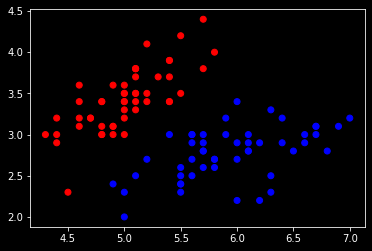

In [4]:
plot_dataset(x, y)

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, epochs=10_000, use_bias=True):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.use_bias = use_bias

    def add_bias(self, x):
        '''If we want to use bias (intercept)'''
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)

    def sigmoid(self, z):
        '''Activation function'''
        return 1 / (1 + np.exp(-z + np.finfo(float).eps))

    def loss(self, h, y):
        '''Loss function is binary cross entropy'''
        return np.mean((-y * np.log(h) - (1 - y) * np.log(1 - h)))

    def _forward(self, x):
        if x.shape[1] != self.theta.shape[0] and self.use_bias:
            x = self.add_bias(x)
        z = np.dot(x, self.theta)
        h = self.sigmoid(z)
        return h

    def fit(self, x, y):
        '''Fit/Train function'''
        if self.use_bias:
            x = self.add_bias(x)

        self.theta = np.random.normal(0, 0.01, (x.shape[1],))

        for _ in range(self.epochs):
            h = self._forward(x)
            gradient = np.dot(x.T, (h - y)) / y.size
            self.theta = self.theta - self.learning_rate * gradient

    def predict_prob(self, x):
        return self._forward(x)

    def predict(self, x):
        y_pred_prob = self.predict_prob(x)
        return np.round(y_pred_prob)

    def score(self, x, y):
        y_pred = self.predict(x)
        return np.mean(y == y_pred)

In [6]:
clf = LogisticRegression(
    learning_rate=0.05, epochs=50_000, use_bias=True
)

clf.fit(x, y)

preds = clf.predict(x)
score = clf.score(x, y)

print(f"Score: {score}")

Score: 0.99


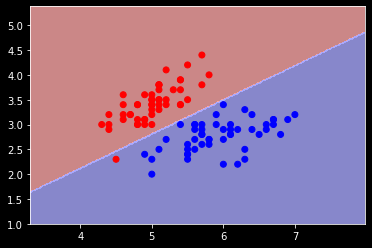

In [7]:
plot(clf, x, y)